In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('output/connections.xlsx', sheet_name='all_with_evidence_unknown')

In [3]:
orf_df = df[["gene_1", "gene_2", "ORF_cosine_similarity"]].fillna(0)
crispr_df = df[["gene_1", "gene_2", "CRISPR_cosine_similarity"]].fillna(0)

orf_df = pd.concat(
    [orf_df, orf_df.rename(columns={"gene_1": "gene_2", "gene_2": "gene_1"})],
    ignore_index=True,
)

crispr_df = pd.concat(
    [
        crispr_df,
        crispr_df.rename(columns={"gene_1": "gene_2", "gene_2": "gene_1"})
    ], ignore_index=True
)

In [4]:
orf_pivot = orf_df.pivot(index='gene_1', columns='gene_2', values='ORF_cosine_similarity').fillna(0)
crispr_pivot = crispr_df.pivot(index='gene_1', columns='gene_2', values='CRISPR_cosine_similarity').fillna(0)

In [5]:
matrix = np.triu(orf_pivot)
matrix += np.tril(crispr_pivot)
np.fill_diagonal(matrix, 1)

matrix_df = pd.DataFrame(
    matrix, index=list(orf_pivot.index), columns=list(orf_pivot.columns)
)

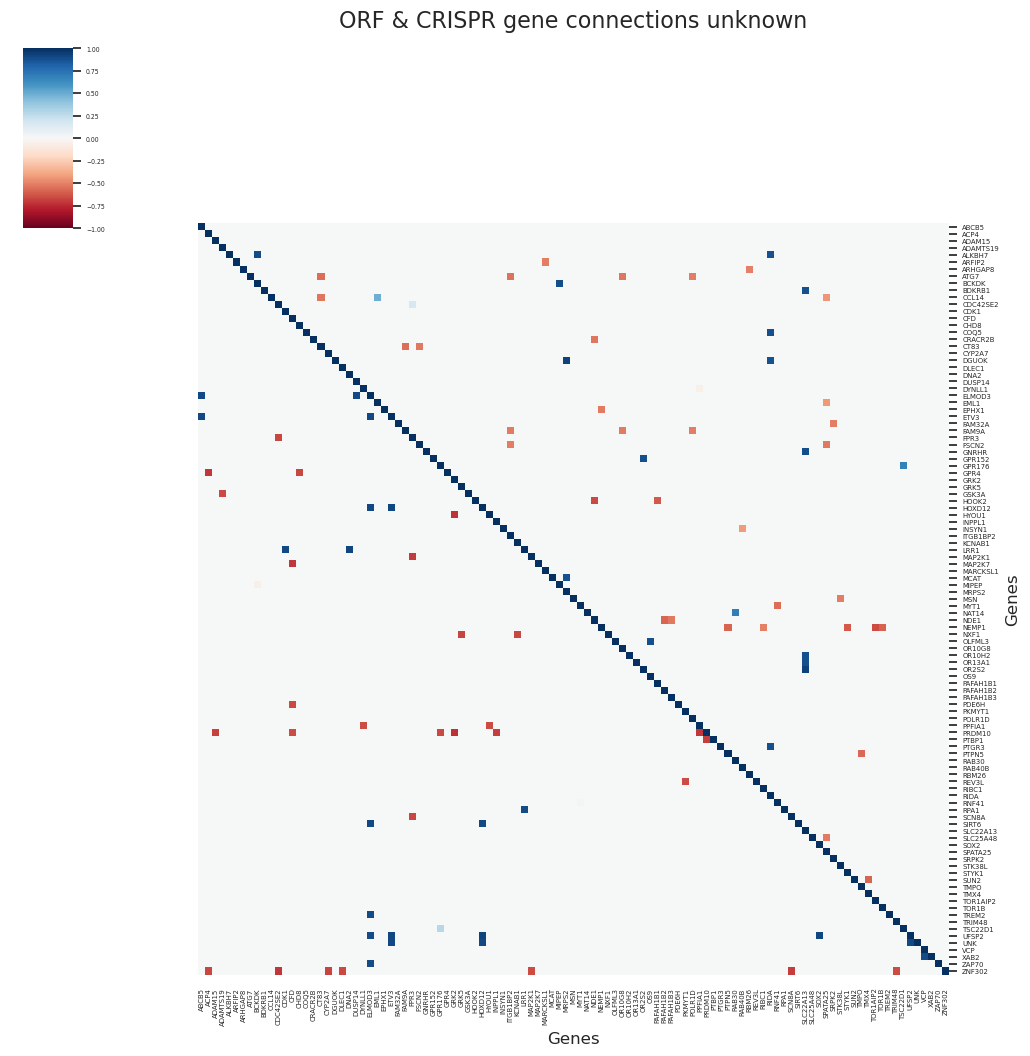

In [6]:
sns.set(rc={"figure.figsize": (48, 32)})
sns.set(font_scale=0.4)

f = sns.clustermap(
    matrix_df,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    col_cluster=False,
    row_cluster=False,
    xticklabels=True, 
    yticklabels=True
)

f.ax_heatmap.set(xlabel="Genes", ylabel="Genes")
f.ax_heatmap.xaxis.label.set_size(12)
f.ax_heatmap.yaxis.label.set_size(12)
f.ax_heatmap.xaxis.set_tick_params(labelsize=5)
f.ax_heatmap.yaxis.set_tick_params(labelsize=5)
f.ax_heatmap.set_title(
    "ORF & CRISPR gene connections unknown", fontsize=16, y=1.25
)
f.savefig("figures/orf_crispr_unknown_connections.png")
f.savefig("figures/orf_crispr_unknown_connections.svg")